In [26]:
import pandas as pd
import json
import datetime

In [27]:
data = []
for line in open('out', 'r'):
    #print(line)
    if (not 'ERROR' in line and line != '\n'):
        try:
            line_json = json.loads(line)['stopTimes']
            #print(line_json)
            
            for time in line_json['times']['Time']:
                filtered = [line_json['actualDate'],
                            line_json['stop']['codStop'],
                            time['line']['codLine'],
                            time['codIssue'],
                            time['time']
                           ]
                #print(filtered)
                data.append(filtered)
        except Exception as e:
            pass
            #print(e)
            #print("ERROR in line: " + line)

data[0]

['2020-02-07T12:51:25+01:00',
 '8_09868',
 '8__656___',
 '5306341',
 '2020-02-07T13:00:11+01:00']

In [28]:
df = pd.DataFrame(data, columns=("actualTime", "codStop", "codLine", "codIssue", "time"))

In [29]:
df.head()

,actualTime,codStop,codLine,codIssue,time
0,2020-02-07T12:51:25+01:00,8_09868,8__656___,5306341,2020-02-07T13:00:11+01:00
1,2020-02-07T12:51:25+01:00,8_09868,8__656___,5305592,2020-02-07T13:06:00+01:00
2,2020-02-07T12:51:25+01:00,8_09868,8__656___,5305746,2020-02-07T13:16:00+01:00
3,2020-02-07T12:51:25+01:00,8_09868,8__815___,5306331,2020-02-07T13:28:38+01:00
4,2020-02-07T12:51:25+01:00,8_09868,8__815___,5306611,2020-02-07T14:27:00+01:00


In [30]:
df['time'] =pd.to_datetime(df['time'])
df['actualTime'] =pd.to_datetime(df['actualTime'])

In [31]:
df['remainingSeconds'] = (df['time'] - df['actualTime']).astype('timedelta64[s]')
df.head()

,actualTime,codStop,codLine,codIssue,time,remainingSeconds
0,2020-02-07 12:51:25+01:00,8_09868,8__656___,5306341,2020-02-07 13:00:11+01:00,526.0
1,2020-02-07 12:51:25+01:00,8_09868,8__656___,5305592,2020-02-07 13:06:00+01:00,875.0
2,2020-02-07 12:51:25+01:00,8_09868,8__656___,5305746,2020-02-07 13:16:00+01:00,1475.0
3,2020-02-07 12:51:25+01:00,8_09868,8__815___,5306331,2020-02-07 13:28:38+01:00,2233.0
4,2020-02-07 12:51:25+01:00,8_09868,8__815___,5306611,2020-02-07 14:27:00+01:00,5735.0


In [32]:
df['remainingSeconds'].hist()

In [33]:
df['remainingSeconds'].describe()
#df['remainingSecs'] = (datetime.datetime.fromisoformat(df['time']) - datetime.datetime.fromisoformat(df['actualTime'])).total_seconds()

count    909826.000000
mean       8563.873515
std       12849.289745
min           1.000000
25%        1159.000000
50%        3021.000000
75%        8847.750000
max       86406.000000
Name: remainingSeconds, dtype: float64

In [34]:
df.query('remainingSeconds <= 10').head()

,actualTime,codStop,codLine,codIssue,time,remainingSeconds
9308,2020-02-07 12:59:53+01:00,8_06002,8__661_A__,8__661_A___1_13:00:00_1_-__4_8__661_A__,2020-02-07 13:00:00+01:00,7.0
9309,2020-02-07 12:59:53+01:00,8_06002,8__661___,8__661____1_13:00:00_1_-__21_8__661___,2020-02-07 13:00:00+01:00,7.0
23458,2020-02-07 13:09:57+01:00,8_06002,8__661___,8__661____1_13:10:00_1_-__22_8__661___,2020-02-07 13:10:00+01:00,3.0
71622,2020-02-07 13:48:40+01:00,8_1333,8__627___,8__627____1_12:36:00_2_u.__36_8__627___,2020-02-07 13:48:49+01:00,9.0
108351,2020-02-07 14:17:42+01:00,8_1333,8__627___,8__627____1_13:00:00_2_u.__38_8__627___,2020-02-07 14:17:52+01:00,10.0


In [35]:
df.query('remainingSeconds < 100').describe()

,remainingSeconds
count,21947.000000
mean,59.928601
std,20.676485
min,1.000000
25%,40.000000
50%,58.000000
75%,78.000000
max,99.000000


In [36]:
df.query("codIssue == '5266999'")['remainingSeconds'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: remainingSeconds, dtype: float64

In [37]:
df['codIssue'].value_counts()

5307611      15273
5307610      15117
5307614      13674
5307613      13618
5307609      13137
             ...  
452432           1
892418614        1
808466992        1
5354561          1
5354574          1
Name: codIssue, Length: 3869, dtype: int64

In [38]:
df.loc[df.groupby('codIssue')['remainingSeconds'].idxmin()].query("codLine == '8__658___'").sort_values(by='time')['time']

3503     2020-02-07 12:54:12+01:00
2758     2020-02-07 12:54:15+01:00
14197    2020-02-07 13:03:47+01:00
32374    2020-02-07 13:15:59+01:00
71043    2020-02-07 13:47:59+01:00
76253    2020-02-07 13:52:54+01:00
88383    2020-02-07 14:01:19+01:00
130210   2020-02-07 14:36:35+01:00
132535   2020-02-07 14:39:56+01:00
165499   2020-02-07 15:06:37+01:00
165232   2020-02-07 15:06:37+01:00
187761   2020-02-07 15:25:15+01:00
204809   2020-02-07 15:38:58+01:00
217744   2020-02-07 15:47:16+01:00
221880   2020-02-07 15:50:35+01:00
225141   2020-02-07 15:54:01+01:00
289177   2020-02-07 16:42:40+01:00
302415   2020-02-07 16:53:07+01:00
315365   2020-02-07 17:03:09+01:00
321035   2020-02-07 17:07:53+01:00
341571   2020-02-07 17:23:33+01:00
375136   2020-02-07 17:50:06+01:00
395917   2020-02-07 18:07:19+01:00
430108   2020-02-07 18:32:10+01:00
428973   2020-02-07 18:32:12+01:00
433193   2020-02-07 18:35:26+01:00
437090   2020-02-07 18:37:22+01:00
495523   2020-02-07 19:22:47+01:00
507362   2020-02-07 

In [39]:
df.query("remainingSeconds < 3600").loc[df.groupby('codIssue')['remainingSeconds'].idxmin()]['codLine'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


8__656___     151
8__651___     134
8__656_A__    131
8__631___     129
8__657___     120
             ... 
8_N_602___      4
8_N_901___      3
8_N_906___      3
8__532___       1
8__574___       1
Name: codLine, Length: 75, dtype: int64

In [40]:
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


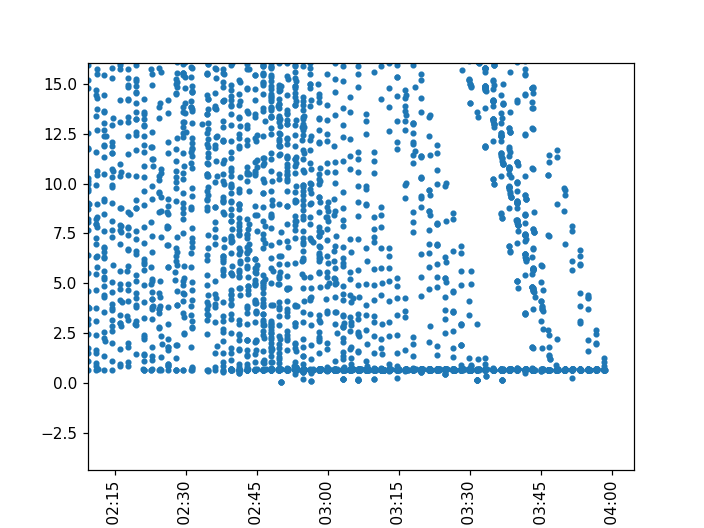

(array([737462.45833333, 737462.58333333, 737462.70833333, 737462.83333333,
        737462.95833333, 737463.08333333, 737463.20833333, 737463.33333333]),
 <a list of 8 Text xticklabel objects>)

In [41]:
df_sorted = df.sort_values('actualTime', ascending=True).query("codLine == '8__656___' & codStop == '8_06297' &remainingSeconds < 1200 & actualTime > '2019-12-30 10:00:00+00'  & actualTime < '2019-12-30  10:30:00+00'")
plt.plot(df['actualTime'], df['remainingSeconds']/60, '.')
plt.xticks(rotation='vertical')

In [42]:
import seaborn
from  matplotlib import pyplot

In [ ]:
fg = seaborn.FacetGrid(data=df_sorted, hue='codIssue')
fg.map(pyplot.scatter, 'actualTime', 'remainingSeconds').add_legend()